---
title: "Naive Bayes"
format: html
---

# Introduction to Naive Bayes

Naive Bayes is a supervised machine learning algorithm used for classification tasks. The algorithm is rooted in Bayes Theorem in that it is based on the probability of a hypothesis, given data and prior knowledge. Below is the equation the Naive Bayes Algorithm uses.

![](./images/Bayes_rule.png)

https://www.saedsayad.com/naive_bayesian.htm

Where P(c|x)= The probability of the target variable class given the features <br>
P(x|c)= The probability of the features given the class <br>
and P(c), P(x) are the prior probabilties of the target variable class and features.

The algorithm estimates the probability of each class for a given data point and assing the class with the highest probability to the data point.

It assumes that all features are independent of each other; this is usually not the case in the real world but the algorithm still provides accurate predictions.

Ultimatley, through Naive Bayes you want to acheive accurate classifications given the algoirthm is given data with a set of variables. In my case, I would like to predict if a certain state's home value will increase substantially in a certain year based on census data.

Different variants of Naive Bayes are used for different applications. Multinomial Naive Bayes is used for word counts and frequency analysis (discrete data). Gaussian Naive Bayes is used for numeric data that is approximatley normally distributed and independent. Bernoulli Naive Bayes is used for binary data, like if a word appears in a document or not.

# Prepare Data for Naive Bayes

In [2]:
import pandas as pd

In [25]:
record=pd.read_csv('data/RecordData.csv')
record=record.drop('DP05_0073E',axis=1)

In [26]:
record.head()

,Year,DP02_0001E,DP02_0002E,DP02_0003E,DP02_0007E,DP02_0011E,DP02_0037E,DP02_0060E,DP02_0061E,DP02_0062E,...,DP04_0134E,DP05_0001E,DP05_0004E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,RegionName,Typical Home Value
0,2018,0.007341,0.009226,-0.008186,0.090413,0.007228,0.004783,0.022710,-0.002918,0.018174,...,0.050667,0.002692,0.003198,0.010283,-0.001775,-0.000327,-0.123824,-0.027097,Alabama,0.038688
1,2019,0.022851,-0.265678,-0.360479,-0.317095,-0.802204,1.302990,-0.588360,-0.705200,0.439418,...,0.024112,0.003133,-0.006376,0.002545,0.005908,0.009572,0.054480,0.015884,Alabama,0.070360
2,2021,0.036880,0.013836,0.056032,-0.010988,0.081890,-0.050374,-0.025077,-0.044056,0.038532,...,0.066914,0.027878,0.008556,0.010152,-0.013376,-0.010947,0.067268,0.040587,Alabama,0.263465
3,2022,0.024848,0.041137,0.053954,-0.058821,0.009307,0.106362,-0.070979,-0.062720,-0.020504,...,0.060395,0.006829,-0.001060,-0.005025,0.006291,-0.002353,-0.017318,0.146484,Alabama,0.076587
4,2018,0.015195,0.000753,-0.043082,-0.078405,0.043289,0.942898,-0.208181,0.031255,0.017837,...,-0.019983,-0.003186,-0.009174,0.011594,-0.000634,0.139775,0.012942,-0.060828,Alaska,0.005789


Currently my explanatory variable is continuious. I must change it to a label variable. To do this, I will choose home value percent changes that are above the mean to 1s, home value percent changes that are below the mean below the mean to 0s.

In [27]:
mean=record['Typical Home Value'].mean()
record['Typical Home Value']=record['Typical Home Value'].apply(lambda x:1 if x>mean else 0)

In [30]:
record=record.drop(['Year','RegionName'],axis=1)

In [31]:
record.head()

,DP02_0001E,DP02_0002E,DP02_0003E,DP02_0007E,DP02_0011E,DP02_0037E,DP02_0060E,DP02_0061E,DP02_0062E,DP02_0063E,...,DP04_0047E,DP04_0134E,DP05_0001E,DP05_0004E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,Typical Home Value
0,0.007341,0.009226,-0.008186,0.090413,0.007228,0.004783,0.022710,-0.002918,0.018174,0.033732,...,0.007581,0.050667,0.002692,0.003198,0.010283,-0.001775,-0.000327,-0.123824,-0.027097,0
1,0.022851,-0.265678,-0.360479,-0.317095,-0.802204,1.302990,-0.588360,-0.705200,0.439418,1.429793,...,-0.000968,0.024112,0.003133,-0.006376,0.002545,0.005908,0.009572,0.054480,0.015884,0
2,0.036880,0.013836,0.056032,-0.010988,0.081890,-0.050374,-0.025077,-0.044056,0.038532,0.007408,...,-0.004602,0.066914,0.027878,0.008556,0.010152,-0.013376,-0.010947,0.067268,0.040587,1
3,0.024848,0.041137,0.053954,-0.058821,0.009307,0.106362,-0.070979,-0.062720,-0.020504,0.014854,...,0.017788,0.060395,0.006829,-0.001060,-0.005025,0.006291,-0.002353,-0.017318,0.146484,0
4,0.015195,0.000753,-0.043082,-0.078405,0.043289,0.942898,-0.208181,0.031255,0.017837,-0.065209,...,-0.043262,-0.019983,-0.003186,-0.009174,0.011594,-0.000634,0.139775,0.012942,-0.060828,0


You must split your fata into training and testing data sets so you can make sure you do not over or under fit.

# Feature Selection

In [59]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\npeno\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
text=pd.read_csv('./data/news.csv')

In [61]:
text['score'] = text['2'].apply(lambda x: sid.polarity_scores(x))
text['score'] = text['score'].apply(lambda x: x['compound']).astype(float)

In [62]:
text['score'].mean()

-0.11629099999999999

Will say if title is above mean it is positive/neutral, below mean negative.

In [63]:
titles=[]
y=[]
#ITERATE OVER ROWS
# for i in range(0,10):  
for i in range(0,text.shape[0]):
    # QUICKLY CLEAN TEXT
    keep="abcdefghijklmnopqrstuvwxyz "
    replace=".,!;"
    tmp=""
    for char in text["2"][i].replace("<br />","").lower():
        if char in replace:
            tmp+=" "
        if char in keep:
            tmp+=char
    tmp=" ".join(tmp.split())
    titles.append(tmp)
    if(text["score"][i]<=text['score'].mean()):
        y.append(0)
    if(text["score"][i]>=text['score'].mean()):
        y.append(1)

In [64]:
y=np.array(y)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(titles,MAX_FEATURES=10000)

In [66]:
print(x.shape,y.shape)

(100, 666) (100,)


In [67]:
vocab1 = dict([(value, key) for key, value in vocab0.items()])

In [68]:
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())

   173  457  394  262  499  645  372  438  30   433  ...  235  238  246  239  \
0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   240  241  242  244  245  665  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  1.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 666 columns]


In [69]:
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

In [70]:
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

   0    1    2    3    4    5    6    7    8    9    ...  656  657  658  659  \
0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   660  661  662  663  664  665  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  1.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 666 columns]
0      15.0
1      14.0
2      12.0
3      11.0
4       7.0
       ... 
661     1.0
662     1.0
663     1.0
664     1.0
665     1.0
Length: 666, dtype: float64


In [71]:
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[22, 84, 76, 50, 95, 46, 54, 44, 3, 48]
[96, 92, 14, 51, 91, 26, 63, 49, 36, 98]


In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)


Here I remove features from high to low.

In [73]:
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [74]:
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

5 50 50 73.75 45.0
10 100 100 85.0 55.00000000000001
15 150 150 87.5 60.0
20 200 200 95.0 55.00000000000001
25 250 250 95.0 60.0
30 300 300 96.25 55.00000000000001
35 350 350 97.5 55.00000000000001
40 400 400 97.5 60.0
45 450 450 97.5 60.0
50 500 500 97.5 60.0
55 550 550 97.5 65.0
60 600 600 98.75 70.0
65 650 650 100.0 65.0
70 700 666 100.0 70.0
75 750 666 100.0 70.0
80 800 666 100.0 70.0
85 850 666 100.0 70.0
90 900 666 100.0 70.0
95 950 666 100.0 70.0
100 1000 666 100.0 70.0
5 3250 666 100.0 70.0
10 5500 666 100.0 70.0
15 7750 666 100.0 70.0
20 10000 666 100.0 70.0


In [75]:
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [76]:
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

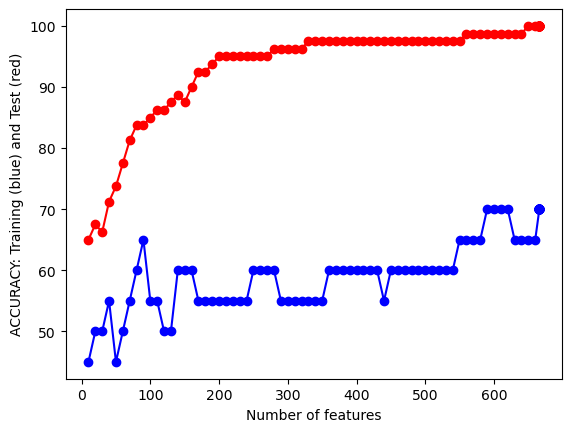

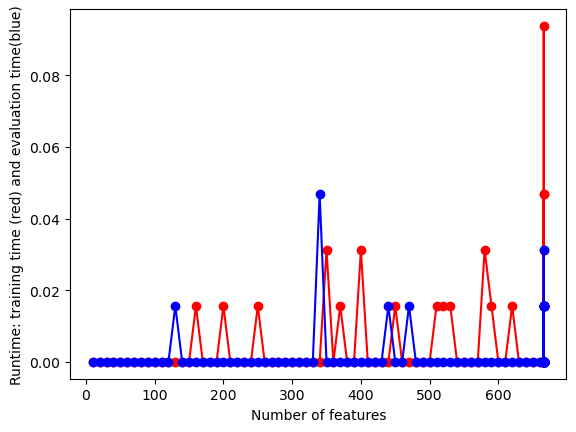

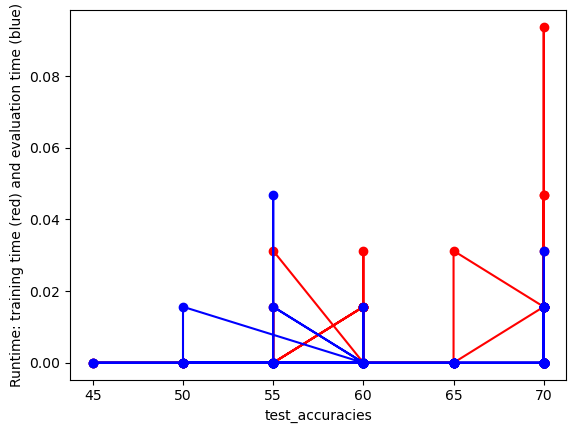

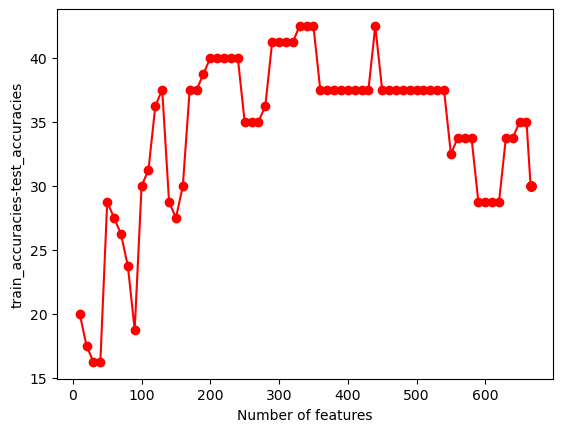

In [77]:
save_results("./data"+"/partial_grid_search")
plot_results("./data"+"/partial_grid_search")

# Naive Bayes with Labeled Record Data

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [51]:
X=record.drop(['Typical Home Value'],axis=1)
y=record['Typical Home Value']

NameError: name 'record' is not defined

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

NameError: name 'X' is not defined

In [39]:
X_train.shape, X_test.shape

((142, 30), (62, 30))

In [41]:
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

In [42]:
y_pred = naive.predict(X_test)

In [43]:
y_pred 

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred)

0.7096774193548387

Fairly accurate for a first model

In [46]:
y_pred_train = naive.predict(X_train)

In [47]:
accuracy_score(y_train, y_pred_train)

0.6197183098591549

Not very accurate on the training set so there is some undefitting going on.

May need to examine the data more to remove outliers

In [48]:
y_test.value_counts()

Typical Home Value
0    43
1    19
Name: count, dtype: int64

In [49]:
43/(43+19)

0.6935483870967742

Our model only does slightly better than just predicting the most frequent class, so the model is not very good.

# Naive Bayes with Labeled Text Data

In [52]:
def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100


In [79]:
train_MNB_model(x,y,i_print=True)

(100, 666) (100,)
100.0 70.0 0.0 0.0


(100.0, 70.0, 0.0, 0.0)

Have 100 percent accuracy on training set and 70 percent accuracy on the test set, so overall not a bad model.